### Image Segmentation using OpenCV (Watershed Algorithm)

**Author:** Kushashwa Ravi Shrimali, International Institute of Information Technology, Naya Raipur

1. **Using watershed Algorithm**

    Steps :

           1. Otsu's binarization - Find threshold - See Fig. 1.1
           2. Sure foreground - erode (removes boundary pixels) - See Fig 1.2
           3. Sure background - dilate (increases object boundary to background) - See Fig. 1.3
       
    **Basic Idea: ** Change image to an image, where catchment basins are the objects you want to segment/identify.

In [71]:
# import necessary modules
import numpy as np
import cv2, matplotlib.pyplot as plt
%matplotlib inline

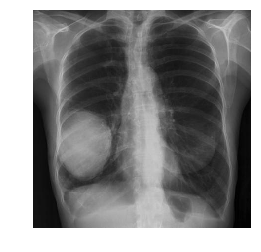

In [72]:
# read image and show
img = cv2.imread('lung_cancer.jpeg') # in BGR mode
# convert to RGB mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

#### Step 1 : Calculating Otsu's binarization (pixel value is either 0 or 1)

```python
if(pixel_value > threshold):
    pixel_value = 1
else:
    pixel_value = 0
```

Threshold limit: 94.0


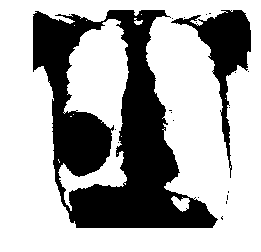

In [73]:
# performing otsu's binarization
# convert to gray scale first
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.axis('off')
plt.imshow(thresh, cmap = 'gray')

In [74]:
# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

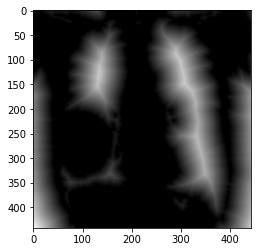

In [75]:
plt.imshow(dist_transform, cmap = 'gray')

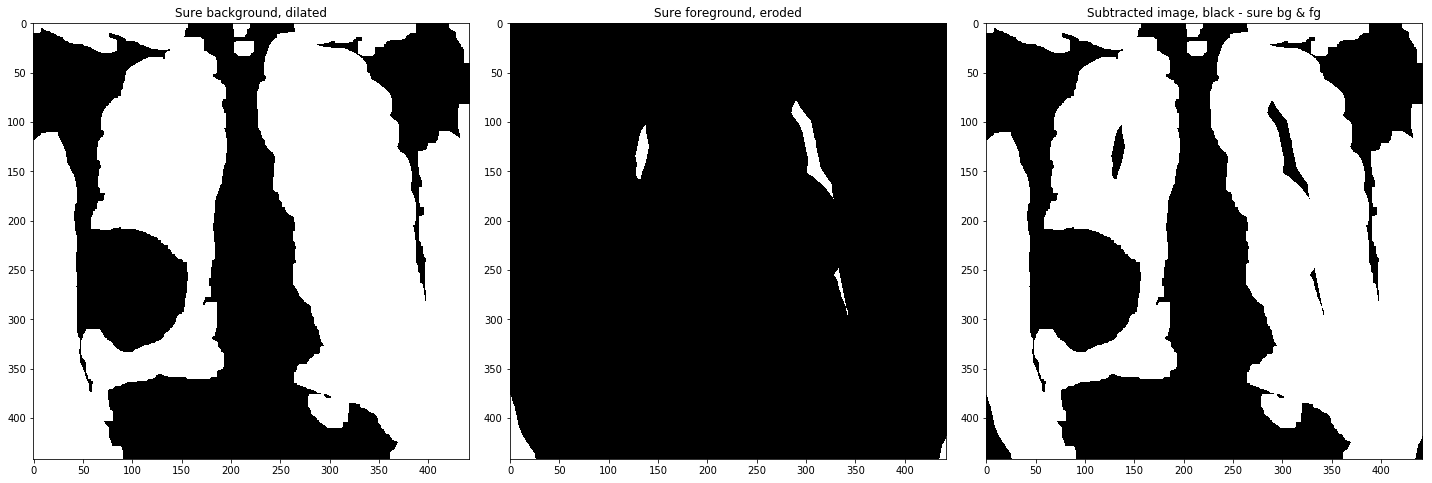

In [76]:
fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(131)
plt.imshow(sure_bg, cmap = 'gray')
plt.title('Sure background, dilated')

plt.subplot(132)
plt.imshow(sure_fg, cmap = 'gray')
plt.title('Sure foreground, eroded')

plt.subplot(133)
plt.imshow(unknown, cmap = 'gray')
plt.title('Subtracted image, black - sure bg & fg')
plt.tight_layout()

# plt.subplots_adjust(wspace = 3)
# fine tuning 
# f.subplots_adjust(wspace=3)

1. **First image above** - is **dilated image**, which increases the object region to background. **Whatever black, is surely background.**

2. **Second imge above** - we use **distance transform** (For connected coins) and then threshold it, to get the sure coins. **(white is sure fg here).**

3. **Third image above** - we subtract the results in first and second figures to get unknown area. **The white area is unknown area.**

Let's represent **sure background and sure foreground** with **positive integers** and **unknown** area with **0**. We use `cv2.connectedDots()` for this which sets background area to 0, we'll add one after this to make sure it does not remain 0 (as we want unknown area to be 0)

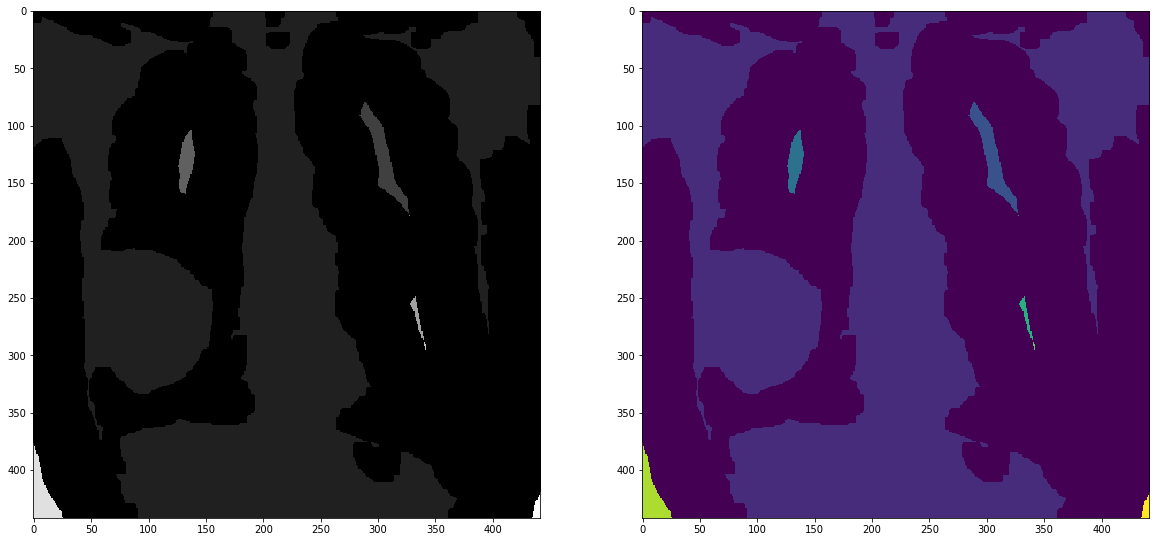

In [77]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown==255] = 0

fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(121)
plt.imshow(markers, cmap = 'gray')
plt.subplot(122)
plt.imshow(markers)

In [78]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [0, 255,0]

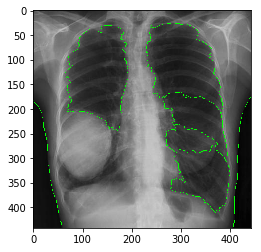

In [79]:
plt.imshow(img)